Sales Data:


,month,sales,month_no
0,Jan,12000,1
1,Feb,13500,2
2,Mar,12800,3
3,Apr,15000,4
4,May,16500,5
5,Jun,15500,6
6,Jul,17200,7
7,Aug,18000,8
8,Sep,17500,9
9,Oct,18500,10



Growth % by month:


,month,sales,growth_%
0,Jan,12000,NaN
1,Feb,13500,12.5
2,Mar,12800,-5.2
3,Apr,15000,17.2
4,May,16500,10.0
5,Jun,15500,-6.1
6,Jul,17200,11.0
7,Aug,18000,4.7
8,Sep,17500,-2.8
9,Oct,18500,5.7



Forecasted Sales for next 3 months:


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,month_no,predicted_sales,month
0,13,21312.0,Jan_2026
1,14,22061.0,Feb_2026
2,15,22811.0,Mar_2026


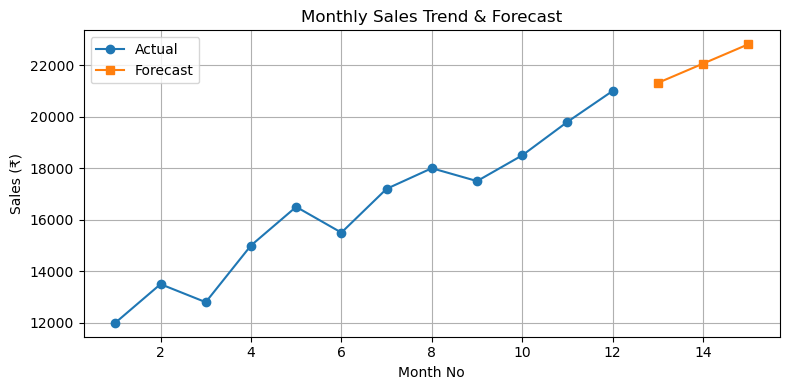


Model Fit → MAE: 549.88, R²: 0.94


In [1]:
# Day 8 — Predictive Indicators: Forecasting the Future
# Author: Shailesh Pawar (Kalkiklyg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# ---------------------------
# 1) Simulate sales data
# ---------------------------
data = {
    'month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    'sales': [12000,13500,12800,15000,16500,15500,17200,18000,17500,18500,19800,21000]
}
df = pd.DataFrame(data)
df['month_no'] = np.arange(1, len(df)+1)
print("Sales Data:")
display(df)

# ---------------------------
# 2) Compute monthly growth %
# ---------------------------
df['growth_%'] = df['sales'].pct_change().round(3) * 100
print("\nGrowth % by month:")
display(df[['month','sales','growth_%']])

# ---------------------------
# 3) Simple Linear Forecast (next 3 months)
# ---------------------------
X = df[['month_no']]
y = df['sales']

model = LinearRegression()
model.fit(X, y)

future_months = np.arange(13, 16).reshape(-1,1)
future_preds = model.predict(future_months)

forecast_df = pd.DataFrame({
    'month_no': [13,14,15],
    'predicted_sales': future_preds.round(0)
})
forecast_df['month'] = ['Jan_2026','Feb_2026','Mar_2026']

print("\nForecasted Sales for next 3 months:")
display(forecast_df)

# ---------------------------
# 4) Combine actuals + forecast
# ---------------------------
combined = pd.concat([
    df[['month_no','month','sales']].rename(columns={'sales':'value'}).assign(type='Actual'),
    forecast_df[['month_no','month','predicted_sales']].rename(columns={'predicted_sales':'value'}).assign(type='Forecast')
])

plt.figure(figsize=(8,4))
for t, marker in [('Actual','o'), ('Forecast','s')]:
    subset = combined[combined['type']==t]
    plt.plot(subset['month_no'], subset['value'], marker=marker, label=t)

plt.title("Monthly Sales Trend & Forecast")
plt.xlabel("Month No")
plt.ylabel("Sales (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("reports/day8_sales_forecast.png")
plt.show()

# ---------------------------
# 5) Evaluation (fit accuracy)
# ---------------------------
preds = model.predict(X)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)
print(f"\nModel Fit → MAE: {mae:.2f}, R²: {r2:.2f}")

